# <p style="padding: 15px; background-color: #778899; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 150%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Emotion Recognition Project</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>Some important characteristics of the dataset:</b> 📜
</p>

<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-bottom: 20px;
">
    <li>The target variable, emotion, is integer encoded with 7 possible label values. You can find descriptions of the label values in the Data tab of the competition.</li>
    <li>The metric used for the contest is classification accuracy.</li>
    <li>There are 28,709 training images.</li>
    <li>The images are grayscale with a resolution of 48x48.</li>
    <li>Since the images are relatively small and in grayscale, the pixel values for images in the training are stored in a single text file rather than as individual images. The test data is provided in a similar way.</li>
</ul>

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color:#f2f2f0;
">
    <b>Task</b> 🕵
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories:
</p>

| categories  | emotion  |
|:---:|:---|
| 0  | Angry  |
| 1  |  Disgust |
| 2  |  Fear |
| 3  |  Happy |
| 4  |  Sad |
| 5  |  Surprise |
| 6  | Neutral |

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>See More Here</b> 📈
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    <a href="https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/overview" style="color: 	#00BFFF;"><b>Facial Emotion Recognition Dataset</b></a>
</p>

</blockquote>

In [1]:
pip install torchsummary





Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms
import torchvision

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from colorama import Fore, Style

CLR = (Fore.BLACK) if False else (Style.BRIGHT + Fore.WHITE)
RED = Style.BRIGHT + Fore.RED
BLUE = Style.BRIGHT + Fore.BLUE
CYAN = Style.BRIGHT + Fore.CYAN


# Matplotlib & Seaborn settings.
FONT_COLOR = "#000"
BACKGROUND_COLOR = "#F6F5F5"
DF_CMAP = sns.light_palette("#252131", as_cmap=True)
MY_RC = {
    "axes.labelcolor": FONT_COLOR,
    "axes.labelsize": 10,
    "axes.labelpad": 15,
    "axes.labelweight": "bold",
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "xtick.labelsize": 7,
    "xtick.color": FONT_COLOR,
    "ytick.labelsize": 7,
    "ytick.color": FONT_COLOR,
    "figure.titlesize": 14,
    "figure.titleweight": "bold",
    "figure.facecolor": BACKGROUND_COLOR,
    "figure.edgecolor": BACKGROUND_COLOR,
    "figure.dpi": 72,  # Locally Seaborn uses 72, meanwhile Kaggle 96.
    "font.size": 14,
    "font.family": "Serif",
    "text.color": FONT_COLOR,
}

sns.color_palette("hls", 8)
sns.set_theme(rc=MY_RC)



<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>In this section, we'll look over the dataset in a general manner.</li>
    <li>Later, we will split the dataset into training, validation, and test sets.</li>
</ul>
</blockquote>


In [3]:
ON_KAGGLE = os.getenv("KAGGLE_KERNEL_RUN_TYPE") is not None

if ON_KAGGLE:
      data = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv')
else:
      data = pd.read_csv('Data/icml_face_data.csv')
      
data

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 35887 entries, 0 to 35886

Data columns (total 3 columns):

 #   Column   Non-Null Count  Dtype 

---  ------   --------------  ----- 

 0   emotion  35887 non-null  int64 

 1    Usage   35887 non-null  object

 2    pixels  35887 non-null  object

dtypes: int64(1), object(2)

memory usage: 841.2+ KB


In [5]:
data.isnull().sum()

emotion    0
 Usage     0
 pixels    0
dtype: int64

In [6]:
data[' Usage'].value_counts()

 Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>This dictionary maps numerical labels to corresponding emotion categories for classification tasks.</li>
    <li>In Graphs we see, that `Disgust` emotion has small percentage of data</li>
    <li>In <code>prepare_data()</code> we split data into image and label tensors</li>
</ul>
</blockquote>


In [7]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
num_labels = 7

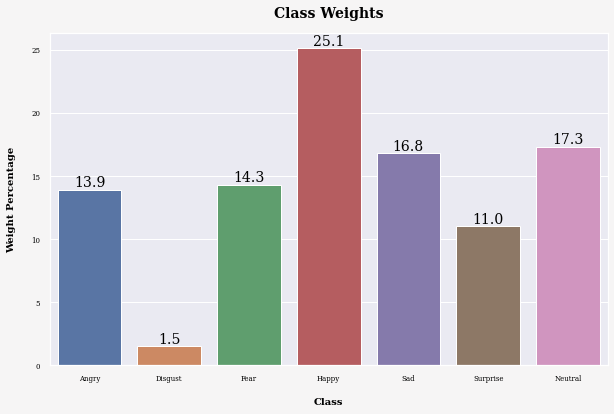

In [8]:
class_weight = dict(
                  zip(emotions.values(), round(((data[data[' Usage']=='Training']['emotion'].value_counts()).sort_index()) 
                                          / len(data[data[' Usage']=='Training']['emotion']) * 100 
                                          , 1
                                    )
                  )
            )

# class_weight = {0: 13.9, 1: 1.5, 2: 14.3, 3: 25.1, 4: 16.8, 5: 11.0, 6: 17.3}


class_weight_df = pd.DataFrame(list(class_weight.items()), columns=['Class', 'Weight'])


plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Class', y='Weight', data=class_weight_df)

for index, row in class_weight_df.iterrows():
    barplot.text(index, row.Weight, round(row.Weight, 1), color='black', ha="center", va='bottom')

plt.ylabel('Weight Percentage')
plt.title('Class Weights')

plt.show()

In [9]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label tensors """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    image_array = torch.from_numpy(image_array)
    image_label = torch.from_numpy(image_label)

        
    return image_array, image_label

In [10]:
df_train_array, df_train_label = prepare_data(data[data[' Usage']=='Training']) # modified train set
df_val_array, df_val_label = prepare_data(data[data[' Usage']=='PublicTest'])
df_test_array, df_test_label = prepare_data(data[data[' Usage']=='PrivateTest'])


print(f"{RED}Train:", f"{CLR}{df_train_array.shape}", f"{df_train_label.shape}")
print(f"{RED}Validation:", f"{CLR}{df_val_array.shape}", f"{df_val_label.shape}")
print(f"{RED}Test:", f"{CLR}{df_test_array.shape}", f"{df_test_label.shape}")




Train: torch.Size([28709, 48, 48]) torch.Size([28709])

Validation: torch.Size([3589, 48, 48]) torch.Size([3589])

Test: torch.Size([3589, 48, 48]) torch.Size([3589])


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>This code snippet prepares training, validation, and test image datasets for a machine learning model using PyTorch. It reshapes the datasets into a format suitable for a convolutional neural network (with 1 channel and 48x48 pixel images).</li>
    <li>Converts the data type to torch.float32, and normalizes the pixel values to the range [0, 1] by dividing by 255.</li>
    <li>Encoding of the target value</li>
</ul>
</blockquote>


In [11]:
train_images = df_train_array.view((df_train_array.shape[0], 1, 48, 48))
train_images = train_images.to(dtype = torch.float32) / 255

val_images = df_val_array.view((df_val_array.shape[0], 1, 48, 48))
val_images = val_images.to(dtype = torch.float32) / 255

test_images = df_test_array.view((df_test_array.shape[0], 1, 48, 48))
test_images = test_images.to(dtype = torch.float32) / 255

In [12]:
def to_categorical_torch(y, num_classes):
    
    return torch.eye(num_classes)[y]


train_labels = to_categorical_torch(df_train_label, 7)
val_labels = to_categorical_torch(df_val_label, 7)
test_labels = to_categorical_torch(df_test_label, 7)


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li style='padding-bottom: 10px;'><code>plot_examples():</code> Plots 5 example images for a specified emotion label.</li>
    <li style='padding-bottom: 10px;'><code>plot_all_emotions():</code> Similar in purpose to plot_examples but instead plots one example for each of the 7 emotions in a single row.</li>
    <li style='padding-bottom: 10px;'><code>plot_image_and_emotion():</code> This function plots a specific test image alongside a bar chart comparing the predicted emotion probabilities against the actual label. It's useful for evaluating the model's performance on individual samples by visually comparing the prediction against the truth.
    </li>
    <li style='padding-bottom: 10px;'><code>plot_compare_distributions():</code> Compares the emotion label distributions between two different arrays (e.g., predicted vs. actual labels) through bar charts. It calculates the distribution of each emotion within the provided arrays and visualizes them side by side for comparison. This is particularly useful for analyzing the model's prediction bias or skewness towards certain emotions.
    </li>
</ul>
</blockquote>


In [13]:
def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
      
      
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(16, 8))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][0][:,:], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax().item()]) 
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
        
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
  
  
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='green')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

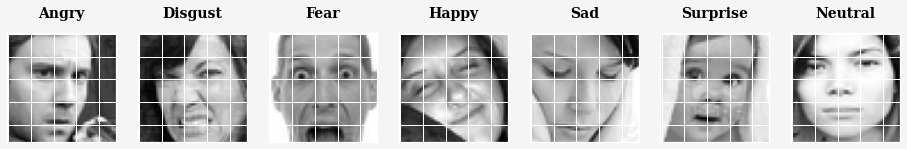

In [14]:
plot_all_emotions()

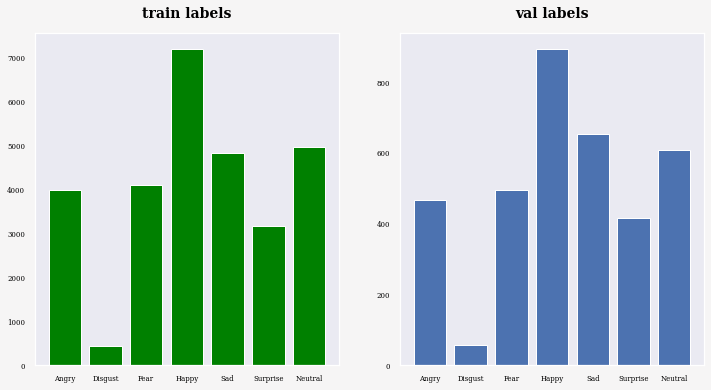

In [15]:
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

# <p style="padding: 15px; background-color: #778899; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 125%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Model Selection</p>

In [16]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.features = nn.Sequential(
            
            # First convolutional block
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.BatchNorm2d(32),
            
            
            # Second convolutional block
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.BatchNorm2d(64),
            
            # Third convolutional block
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.BatchNorm2d(128),
        )
        
        
        self.classifier = nn.Sequential(
            nn.Linear(6*6*128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(32),
            nn.Linear(32, 7),
            nn.ReLU()  
        )
    
    def forward(self, x):
        x = self.features(x)         
        x = x.view(-1, 6*6*128)       
        x = self.classifier(x)        
        return x

In [17]:
# See Model
model = ConvNet()
# summary(model,  (1, 48, 48))

### Device configuration


In [18]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)



if torch.cuda.is_available():
      device = torch.device('cuda')
      print(f"Using device: {device}")
      print(torch.cuda.get_device_name(0))

elif torch.backends.mps.is_available():
      device = torch.device("mps")
      print(f"Using device: {device}")
      print('Running on the GPU')
else:
      device = torch.device("cpu")
      print('Running on the CPU')

      

PyTorch version: 2.1.2

Torchvision version: 0.16.2

Using device: cuda

Tesla P100-PCIE-16GB


### `training_weights` - for Calculating weights for each Batch Size.
### `calculate_weights` - for calculating weights .
### `plot_losses` -  for ploting losses.

In [32]:
def calculate_weights(data_loader, len_train_dataset, batch, model, optimizer, criterion, training = True,  num_epochs = 10,  step_split = 1):
    
      loss_values = []
      accuracy_values = []
      since = time.time()
      
      n_total_steps = len(data_loader) 
      best_loss = float('inf')
        
      

      for epoch in range(num_epochs):
            
            running_corrects = 0.0
                        
            for i, (images, labels) in enumerate(data_loader):  # Now enumerating over train_loader
                  
                  # Move images and labels to device if using GPU
                  images, labels = images.to(device), labels.to(device)
                  
                  # Forward pass
                  outputs = model(images)
                  _, preds = torch.max(outputs, 1)  
                  loss = criterion(outputs, labels)

                  # Backward and optimize
                  optimizer.zero_grad()
                  loss.backward()
                  optimizer.step()
                  
                  
                    
                  running_corrects += torch.sum(preds == labels.data)  
                  epoch_acc = running_corrects.float() / len_train_dataset
                  
                  
                  if training:
                        if epoch % 10 == 0:
                              if (i + 1) % (n_total_steps//step_split) == 0:
                                    print(f'{RED}Batch: {CLR}{batch}, {RED}Epoch {CLR}[{epoch+1}/{num_epochs}], {RED}Step {CLR}[{i+1}/{n_total_steps}], {RED}Loss: {BLUE}{loss.item():.4f}, {RED}Acc: {BLUE}{epoch_acc:.4f}')

                        
                        # Saving The Best Params
                        if loss.item() < best_loss - 0.1:
                              best_loss = loss.item()
                              torch.save(model, 'best-model.pt')
                              torch.save(model.state_dict(), 'best-model-parameters.pt')
                              
                              
                        
                              
                  else:
                        if epoch % 20 == 0:
                              if (i + 1) % (n_total_steps//step_split) == 0:
                                    print(f'{RED}Batch: {CLR}{batch}, {RED}Epoch {CLR}[{epoch+1}/{num_epochs}], {RED}Step {CLR}[{i+1}/{n_total_steps}], {RED}Loss: {BLUE}{loss.item():.4f}, {RED}Acc: {BLUE}{epoch_acc:.4f}')
      
                        
                        
            # Saving Loss and Accuracy for each Batch Size
            loss_values.append(loss.item())
            accuracy_values.append(epoch_acc.cpu())
            
            
        
      time_elapsed = time.time() - since
      print(f"{CLR}Training complete in {(time_elapsed // 60):.0f}m {(time_elapsed % 60):.0f}s")  
      print()  
    
      if training:
            accuracies = {}
            accuracies.update({batch: accuracy_values})
            plot_accuracy(LEARNING_RATE, accuracies, num_epochs)
            return print(f"{CLR}Finished")
      
        
      return loss_values , accuracy_values




def plot_losses(lr_rate, losses, epochs):
      plt.figure(figsize=(24, 8))
      
      for key, value in losses.items():
            plt.plot(range(epochs), value, label = f'For batch: {key}')
      
      plt.title(f'Training Loss by Epoch, Learning Rate : {lr_rate}')
      plt.xlabel('Epoch')
      plt.ylabel('Loss')      
      plt.legend()
      plt.show()


def plot_accuracy(lr_rate, accuracies, epochs):
      plt.figure(figsize=(18, 8))

      for key, value in accuracies.items():
            plt.plot(range(epochs), value, label = f"For batch: {key}")
            
      plt.title(f'Training Loss by Epoch, Learning Rate : {lr_rate}')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.show()
      
      

def reset_weights(m):
    """
    Resets model weights to avoid weight leakage between training runs with different batch sizes.
    """
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()
        

def initialize_optimizer(model, learning_rate):
    
    return torch.optim.Adam(model.parameters(), lr=learning_rate)



def tuning_model(model, optimizer, criterion, epochs, batch_sizes, learning_rate):
      
        losses = {}
        accuracies = {}
        all_time_start = time.time()

        train_dataset = TensorDataset(train_images, df_train_label)
        len_train_dataset = len(train_dataset)
        
        
        for lr_rate in learning_rate:
            print(f"For Learning Rate: {RED}{lr_rate}")
            
            for batch in batch_sizes:

                train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True)

                model.apply(reset_weights)
                optimizer = initialize_optimizer(model, lr_rate) 

                # Train the model with the current batch size
                loss_batch, accuracy_batch = calculate_weights(train_loader, len_train_dataset, batch, model=model, optimizer=optimizer, criterion=criterion, training=False, num_epochs=epochs)
                losses.update({batch: loss_batch})
                accuracies.update({batch: accuracy_batch})


            all_time = time.time() - all_time_start    

            print(f"{BLUE}Training complete in {(all_time // 60):.0f}m {(all_time % 60):.0f}s")  
            print(f"{BLUE}Ploting Losses and Accuracies")      
            print()  


            plot_losses(lr_rate, losses, epochs)
            print()
            plot_accuracy(lr_rate, accuracies, epochs)
        
        
        all_time = time.time() - all_time_start    
        print(f"{BLUE}Finished All Trainings !!!")
        print(f"{BLUE}Training complete in {(all_time // 60):.0f}m {(all_time % 60):.0f}s")  
      
      


      
      

# Model Tuning

For Learning Rate: 0.001

Batch: 64, Epoch [1/100], Step [449/449], Loss: 1.7144, Acc: 0.2919

Batch: 64, Epoch [21/100], Step [449/449], Loss: 0.5653, Acc: 0.7427

Batch: 64, Epoch [41/100], Step [449/449], Loss: 0.3953, Acc: 0.8279

Batch: 64, Epoch [61/100], Step [449/449], Loss: 0.3367, Acc: 0.8763

Batch: 64, Epoch [81/100], Step [449/449], Loss: 0.1021, Acc: 0.8976

Training complete in 6m 4s



Batch: 128, Epoch [1/100], Step [225/225], Loss: 1.8510, Acc: 0.2903

Batch: 128, Epoch [21/100], Step [225/225], Loss: 0.8846, Acc: 0.7372

Batch: 128, Epoch [41/100], Step [225/225], Loss: 0.3649, Acc: 0.8393

Batch: 128, Epoch [61/100], Step [225/225], Loss: 0.1554, Acc: 0.8798

Batch: 128, Epoch [81/100], Step [225/225], Loss: 0.3209, Acc: 0.9043

Training complete in 5m 59s



Batch: 256, Epoch [1/100], Step [113/113], Loss: 1.6847, Acc: 0.2849

Batch: 256, Epoch [21/100], Step [113/113], Loss: 0.9019, Acc: 0.7222

Batch: 256, Epoch [41/100], Step [113/113], Loss: 0.5750, Acc: 0.8291

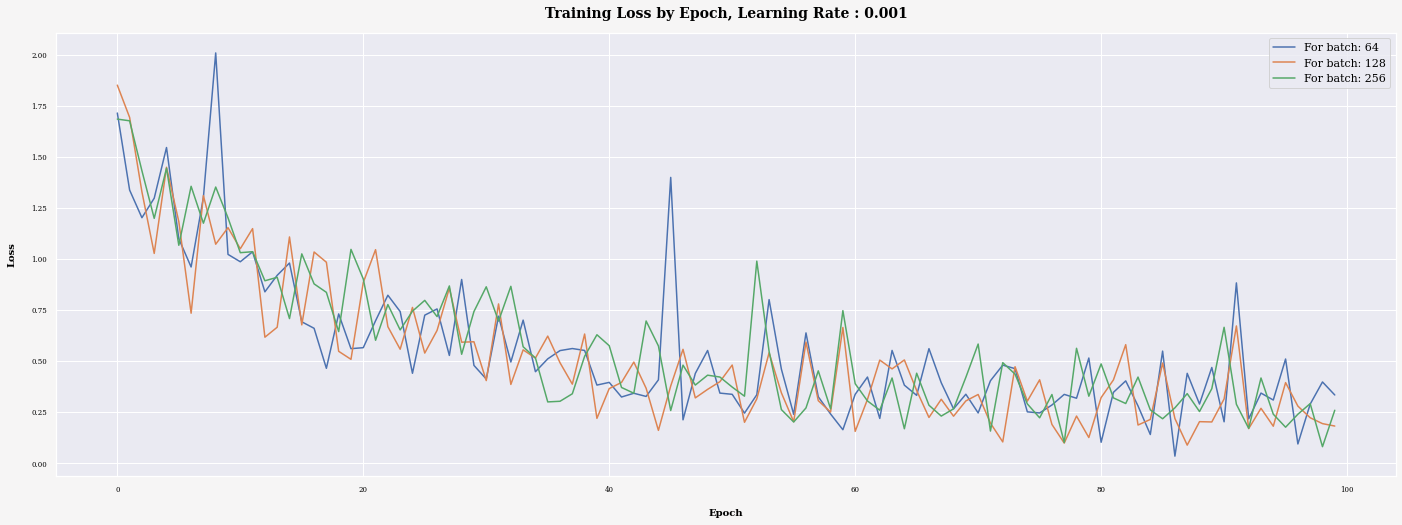

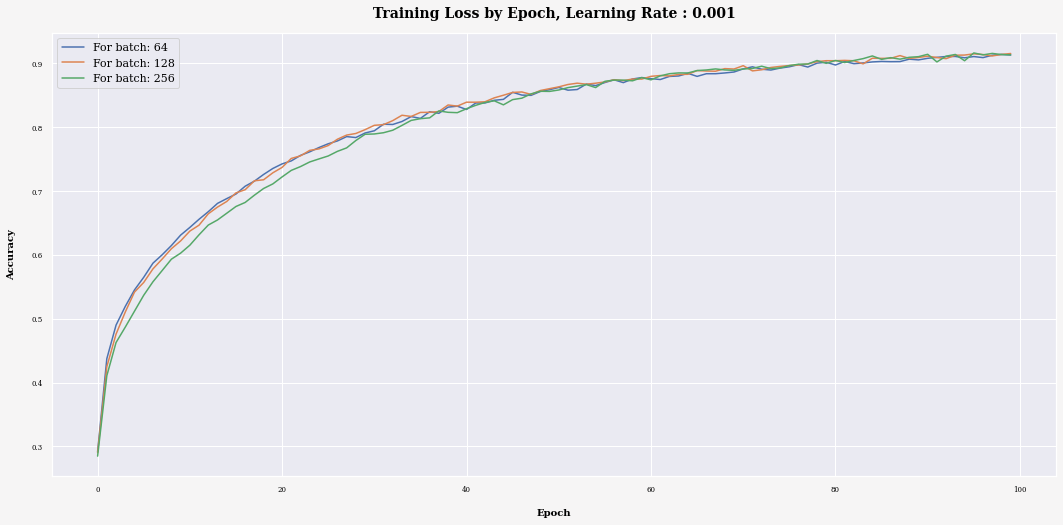

For Learning Rate: 0.0001

Batch: 64, Epoch [1/100], Step [449/449], Loss: 1.8824, Acc: 0.2095

Batch: 64, Epoch [21/100], Step [449/449], Loss: 0.6991, Acc: 0.6519

Batch: 64, Epoch [41/100], Step [449/449], Loss: 0.7416, Acc: 0.7851

Batch: 64, Epoch [61/100], Step [449/449], Loss: 0.4646, Acc: 0.8490

Batch: 64, Epoch [81/100], Step [449/449], Loss: 0.1289, Acc: 0.8821

Training complete in 6m 4s



Batch: 128, Epoch [1/100], Step [225/225], Loss: 1.9533, Acc: 0.1924

Batch: 128, Epoch [21/100], Step [225/225], Loss: 1.3666, Acc: 0.6352

Batch: 128, Epoch [41/100], Step [225/225], Loss: 0.7574, Acc: 0.7662

Batch: 128, Epoch [61/100], Step [225/225], Loss: 0.5235, Acc: 0.8375

Batch: 128, Epoch [81/100], Step [225/225], Loss: 0.4288, Acc: 0.8708

Training complete in 5m 59s



Batch: 256, Epoch [1/100], Step [113/113], Loss: 1.8708, Acc: 0.1588

Batch: 256, Epoch [21/100], Step [113/113], Loss: 1.4769, Acc: 0.5749

Batch: 256, Epoch [41/100], Step [113/113], Loss: 0.7532, Acc: 0.724

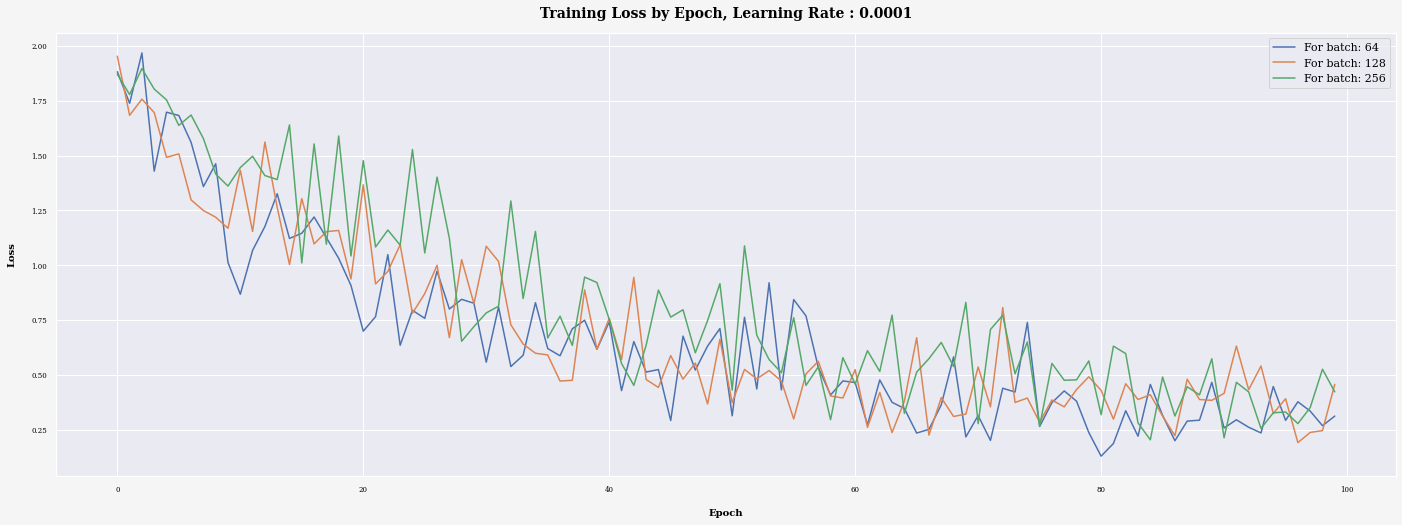

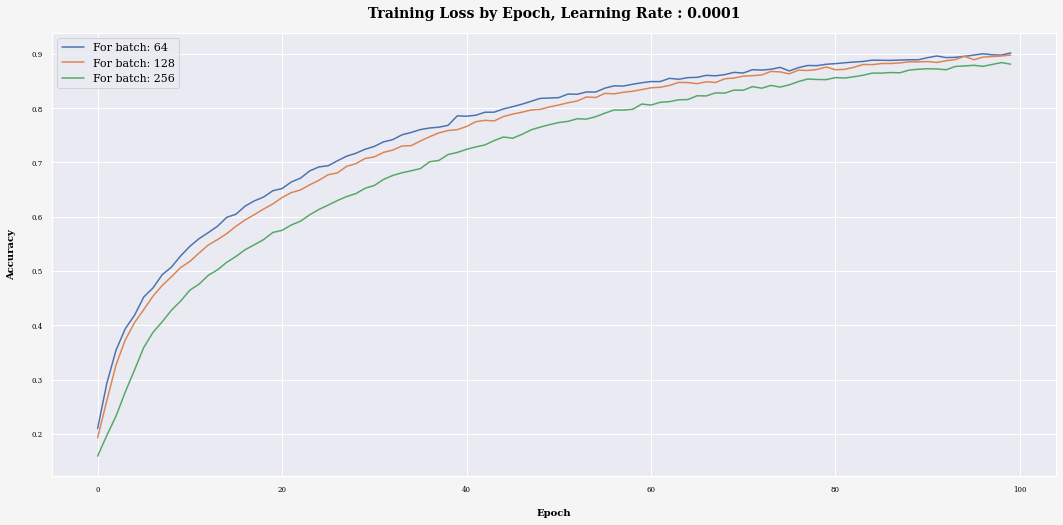

For Learning Rate: 1e-05

Batch: 64, Epoch [1/100], Step [449/449], Loss: 1.9406, Acc: 0.1523

Batch: 64, Epoch [21/100], Step [449/449], Loss: 1.5257, Acc: 0.3658

Batch: 64, Epoch [41/100], Step [449/449], Loss: 1.4311, Acc: 0.4704

Batch: 64, Epoch [61/100], Step [449/449], Loss: 1.2109, Acc: 0.5334

Batch: 64, Epoch [81/100], Step [449/449], Loss: 1.1411, Acc: 0.5862

Training complete in 6m 5s



Batch: 128, Epoch [1/100], Step [225/225], Loss: 1.9739, Acc: 0.1523

Batch: 128, Epoch [21/100], Step [225/225], Loss: 1.8764, Acc: 0.3436

Batch: 128, Epoch [41/100], Step [225/225], Loss: 1.4625, Acc: 0.4311

Batch: 128, Epoch [61/100], Step [225/225], Loss: 1.5126, Acc: 0.4904

Batch: 128, Epoch [81/100], Step [225/225], Loss: 1.1810, Acc: 0.5386

Training complete in 5m 59s



Batch: 256, Epoch [1/100], Step [113/113], Loss: 2.0112, Acc: 0.1494

Batch: 256, Epoch [21/100], Step [113/113], Loss: 1.8582, Acc: 0.2955

Batch: 256, Epoch [41/100], Step [113/113], Loss: 1.3516, Acc: 0.3928

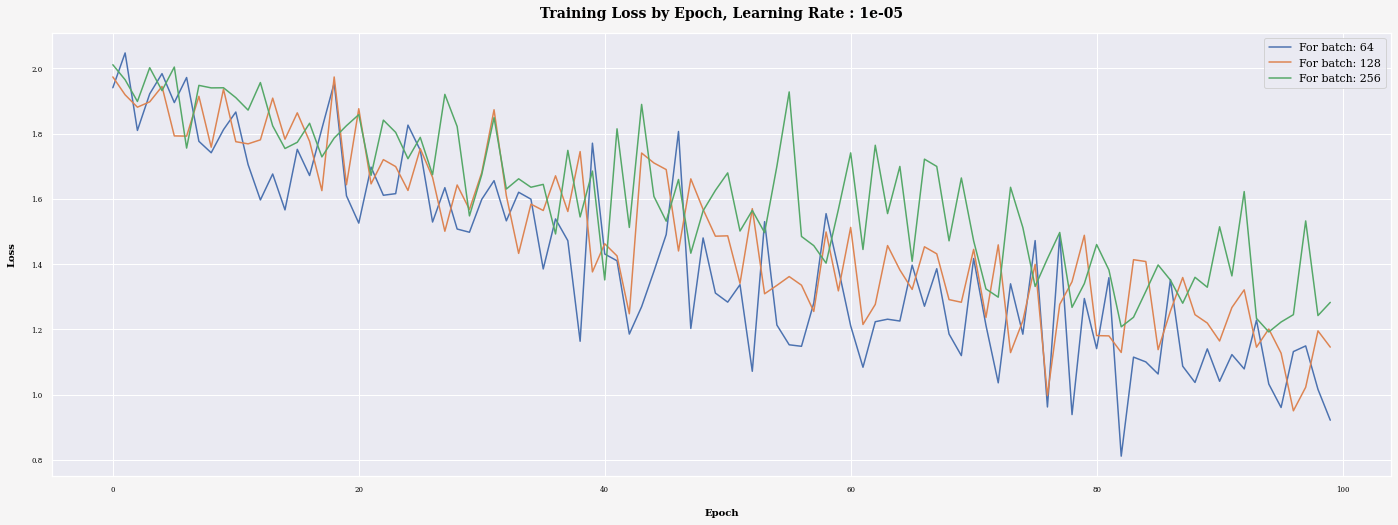

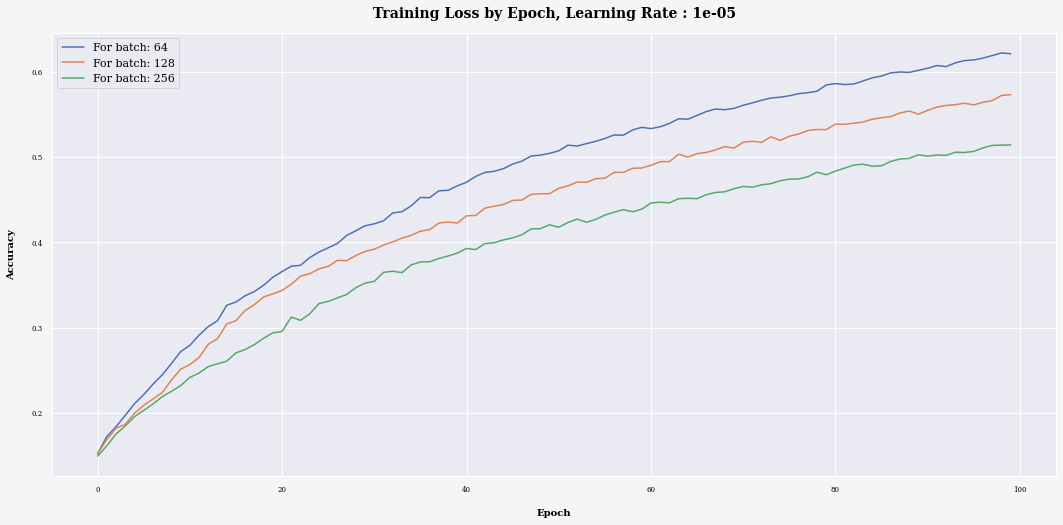

Finished All Trainings !!!

Training complete in 52m 33s


In [33]:
# Hyperparameters
LEARNING_RATE = [0.001, 1e-04, 1e-05]
EPOCHS = 100
BATCH_SIZE = [64, 128, 256]
WEIGHTS = torch.tensor([1.0, 5.0, 1.0, 0.9, 1.0, 1.8, 1.0], dtype=torch.float).to(device)

# Model
model = ConvNet().to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss(weight=WEIGHTS)

# Training
tuning_model(model, optimizer, criterion, EPOCHS, BATCH_SIZE, LEARNING_RATE)

In [34]:
# Hyperparameters
LEARNING_RATE = 0.0001
EPOCHS = 200
BATCH_SIZE = 64
WEIGHTS = torch.tensor([1.0, 5.0, 1.0, 0.8, 1.0, 1.8, 1.0], dtype=torch.float).to(device)

      
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss(weight=WEIGHTS)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)


train_dataset = TensorDataset(train_images, df_train_label)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
len_train_dataset = len(train_dataset)

val_dataset = TensorDataset(val_images, df_val_label)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

test_dataset = TensorDataset(test_images, df_test_label)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


calculate_weights(train_loader, len_train_dataset, BATCH_SIZE, model=model, optimizer = optimizer, criterion = criterion, training=True,
                  num_epochs = EPOCHS)



Batch: 64, Epoch [1/200], Step [449/449], Loss: 1.8350, Acc: 0.2302

Batch: 64, Epoch [11/200], Step [449/449], Loss: 1.1767, Acc: 0.5778

Batch: 64, Epoch [21/200], Step [449/449], Loss: 0.8086, Acc: 0.6909

Batch: 64, Epoch [31/200], Step [449/449], Loss: 0.4975, Acc: 0.7654

Batch: 64, Epoch [41/200], Step [449/449], Loss: 0.4695, Acc: 0.8225

Batch: 64, Epoch [51/200], Step [449/449], Loss: 0.2199, Acc: 0.8507

Batch: 64, Epoch [61/200], Step [449/449], Loss: 0.3474, Acc: 0.8738

Batch: 64, Epoch [71/200], Step [449/449], Loss: 0.4505, Acc: 0.8889

Batch: 64, Epoch [81/200], Step [449/449], Loss: 0.2951, Acc: 0.9024

Batch: 64, Epoch [91/200], Step [449/449], Loss: 0.5383, Acc: 0.9096

Batch: 64, Epoch [101/200], Step [449/449], Loss: 0.2411, Acc: 0.9126

Batch: 64, Epoch [111/200], Step [449/449], Loss: 0.0807, Acc: 0.9214

Batch: 64, Epoch [121/200], Step [449/449], Loss: 0.3455, Acc: 0.9240

Batch: 64, Epoch [131/200], Step [449/449], Loss: 0.5520, Acc: 0.9273

Batch: 64, Epoch 

TypeError: plot_accuracy() missing 1 required positional argument: 'epochs'

In [35]:
def pred_labels(data_loader, num_labels=num_labels):
      
      pred_test_labels = []
      test_labels = []
      
      emotions_list = list(emotions.values())
      print(f"{CLR} {str()}")
      
      # Load the entire model
      model = torch.load('best-model.pt')
      
      
      with torch.no_grad():
    
            n_correct = 0
            n_samples = 0
            n_class_correct = [0 for i in range(num_labels)]
            n_class_samples = [0 for i in range(num_labels)]
            
            for images, labels in data_loader:
                  
                  images, labels = images.to(device), labels.to(device)
                  outputs = model(images)
                  # max returns (value ,index)
                  _, predicted = torch.max(outputs, 1)
                  n_samples += labels.size(0)
                  n_correct += (predicted == labels).sum().item()
                  
                  pred_test_labels.extend(predicted.cpu().numpy())
                  test_labels.extend(labels.cpu().numpy())
                  

                  for i in range(len(labels)):
                        label = labels[i].item()
                        pred = predicted[i].item()
                        if (label == pred):
                              n_class_correct[label] += 1
                        n_class_samples[label] += 1
      

            pred_test_labels = np.array(pred_test_labels)
            test_labels = np.array(test_labels)

            acc = 100.0 * n_correct / n_samples
            print(f'{CLR}Accuracy of {RED}The Network  {BLUE}{acc:.3f} %', sep='')

            for i in range(num_labels):
                  acc = 100.0 * n_class_correct[i] / n_class_samples[i]
                  print(f'{CLR}Accuracy of {RED}{emotions_list[i]}  {BLUE}{acc:.3f} %')
      
      print()  
    
      return pred_test_labels, test_labels
                  
      

 

Accuracy of The Network  87.809 %

Accuracy of Angry  82.778 %

Accuracy of Disgust  67.890 %

Accuracy of Fear  83.525 %

Accuracy of Happy  95.107 %

Accuracy of Sad  85.342 %

Accuracy of Surprise  87.196 %

Accuracy of Neutral  89.325 %




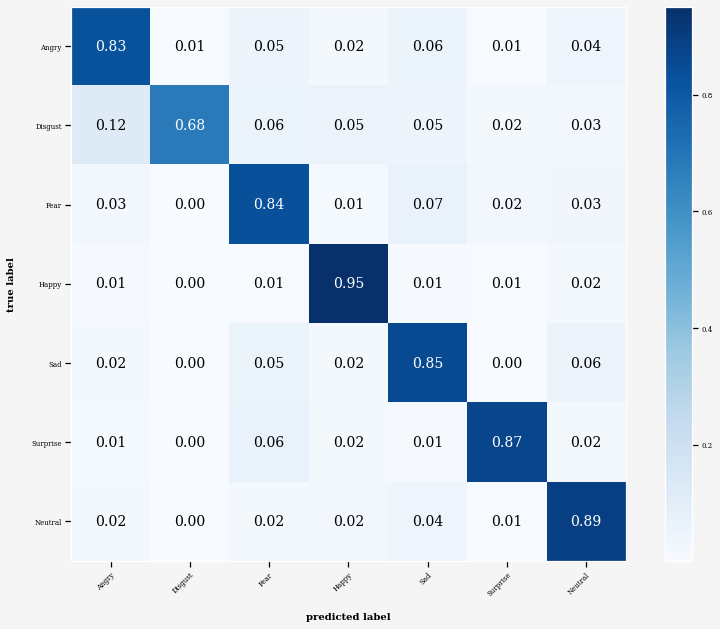

In [36]:
pred_test_labels, test_labels = pred_labels(train_loader)


conf_mat = confusion_matrix(test_labels, pred_test_labels)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                colorbar=True,
                                class_names=emotions.values(),
                                figsize=(14, 10))
fig.show()

 

Accuracy of The Network  55.921 %

Accuracy of Angry  45.621 %

Accuracy of Disgust  34.545 %

Accuracy of Fear  43.371 %

Accuracy of Happy  77.702 %

Accuracy of Sad  41.919 %

Accuracy of Surprise  65.865 %

Accuracy of Neutral  52.556 %




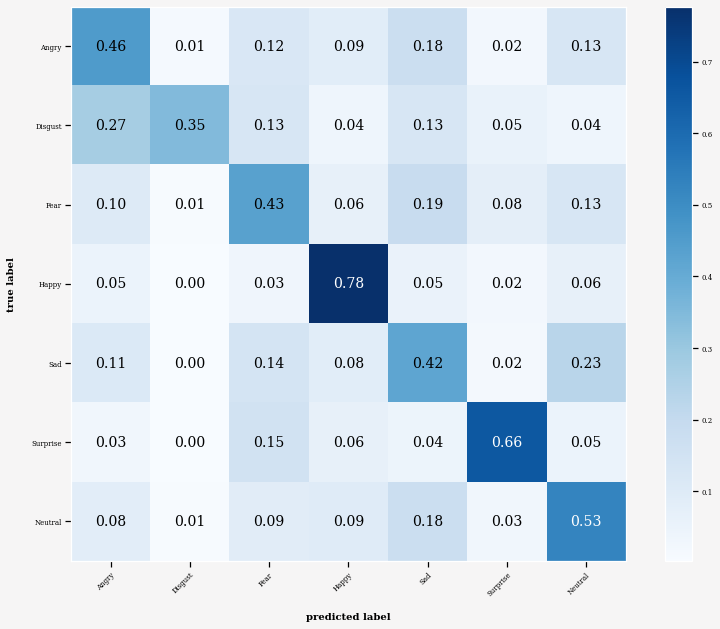

In [37]:
pred_test_labels, test_labels = pred_labels(test_loader)


conf_mat = confusion_matrix(test_labels, pred_test_labels)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                colorbar=True,
                                class_names=emotions.values(),
                                figsize=(14, 10))
fig.show()